### 2-1. Nate 뉴스기사 제목 스크래핑하기 (필수)
https://news.nate.com/recent?mid=n0100

최신뉴스, 정치 , 경제, 사회, 세계, IT/과학 
6개의 섹션의 뉴스를 출력하는 함수를 생성하여 스크래핑 하기

Image, 기사제목, 기사링크

뉴스기사의 Image를 출력 하세요 
1) Image의 절대경로와 상대 경로를 합치려면 urljoin 함수를 사용하세요.
    from urllib.parse import urljoin

2) Image 출력은 Image 클래스와 display 함수를 사용하세요.
    from IPython.display import Image, display

3) img 엘리먼트의 존재 여부를 체크하신 후에 src 속성의 이미지를 경로를 추출하기
  => Image 가 없는 뉴스도 있기 때문에 

=============== 경제 뉴스 ===============
제목: 쿠팡 사회공헌위원회 위원장에 박대준 대표
링크: https://news.nate.com/view/20250723n33237?mid=n0102


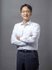

------------------------------------------------------------
제목: "고액·상습 체납자 모든 수단 동원해 징수"
링크: https://news.nate.com/view/20250723n33236?mid=n0102


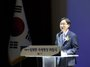

------------------------------------------------------------
제목: SK하이닉스, 상반기 PI 성과급 '최대치' 150% 지급
링크: https://news.nate.com/view/20250723n33229?mid=n0102


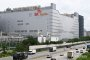

------------------------------------------------------------
제목: 소비쿠폰 풀리자…편의점 한우·라면 불티
링크: https://news.nate.com/view/20250723n33228?mid=n0102


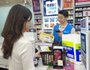

------------------------------------------------------------
제목: 모디 인도 총리, 영국 국빈방문…"FTA 서명 예정"
링크: https://news.nate.com/view/20250723n33222?mid=n0102


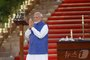

------------------------------------------------------------
제목: [카드] "따뜻함을 전합니다"…쿠팡 사회공헌위원회 공식 출범
링크: https://news.nate.com/view/20250723n33221?mid=n0102


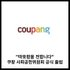

------------------------------------------------------------
제목: 집값 기대감 꺾였다지만…응답자 절반 "1년 뒤엔 다시 오를 것"
링크: https://news.nate.com/view/20250723n33220?mid=n0102


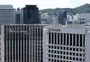

------------------------------------------------------------
제목: 일본 품목별 관세 인하 합의에 기대감…한국 자동차주도 급등
링크: https://news.nate.com/view/20250723n33001?mid=n0102


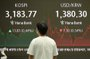

------------------------------------------------------------
제목: KDI "韓 슈퍼스타 기업 씨 말라…산업 역동성 약화"
링크: https://news.nate.com/view/20250723n33214?mid=n0102


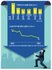

------------------------------------------------------------
제목: 국세청장, 110조 체납액 징수 '선전 포고'…"조직 신설해 전수조사"
링크: https://news.nate.com/view/20250723n32995?mid=n0102


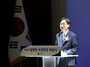

------------------------------------------------------------


In [17]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display

# 섹션별 URL 딕셔너리
section_dict = {
    '최신뉴스': 'n0100','정치': 'n0101', '경제': 'n0102', '사회': 'n0103', 
    '세계': 'n0104', 'IT/과학': 'n0105'
}

def scrape_politics_news(section_name):
    section_one = section_dict.get(section_name)
    url = f'https://news.nate.com/recent?mid={section_one}' 
    res = requests.get(url)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, 'html.parser')

    print(f"=============== {section_name} 뉴스 ===============")

    # 뉴스 각각의 <a> 태그가 들어있는 div들을 선택
    news_anchors = soup.select('div.mduSubjectList a.lt1')

    for a_tag in news_anchors[:10]:
        # 뉴스 링크
        link = a_tag.get('href')
        full_link = urljoin(url, link)

        # 제목은 a 태그 안의 h2.tit
        title_tag = a_tag.find('h2', class_='tit')
        title = title_tag.get_text(strip=True) if title_tag else "제목 없음"

        print(f"제목: {title}")
        print(f"링크: {full_link}")

        # 이미지가 있는 경우가 있으면 img 태그 찾아보기
        img_tag = a_tag.find('img')
        if img_tag and img_tag.has_attr('src'):
            img_src = img_tag['src']
            full_img_url = urljoin(url, img_src)
            display(Image(full_img_url))
        else:
            print("이미지 없음")

        print('-' * 60)

# 실행
scrape_politics_news('경제')


### 2-2. 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기 (필수)
- 하나의 웹툰의 제목(title)과 회차번호(no),회차의URL(url) 을 입력으로 받는 함수를 선언합니다. 
   def download_one_episode(title,no,url):

- 아래와 같이 호출합니다.

  download_one_episode('일렉시드',341,'https://comic.naver.com/webtoon/detail?titleId=717481&no=341&week=wed')

- img\일렉시드\341 디렉토리가 생성되며 , 
그 디렉토리 아래에 웹툰 image들이 다운로드 되도록 해주세요.


In [13]:
import requests
from bs4 import BeautifulSoup
import os

def download_one_episode(title, no, url):
    # 요청 헤더
    req_header = {
        'referer': url,
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
    }

    res = requests.get(url, headers=req_header)
    if not res.ok:
        print(f"요청 실패: {res.status_code}")
        return

    soup = BeautifulSoup(res.text, 'html.parser')

    # 이미지 태그 선택 (IMAG01이 포함된 src)
    img_tags = soup.select("img[src*='IMAG01']")
    if not img_tags:
        print("이미지를 찾을 수 없습니다.")
        return

    imgdir = 'img'
    titledir = os.path.join(imgdir, title)
    epdir = os.path.join(titledir, str(no))

    if not os.path.isdir(imgdir):
        os.mkdir(imgdir)

    if not os.path.isdir(titledir):
        os.mkdir(titledir)

    if not os.path.isdir(epdir):
        os.mkdir(epdir)


    print(f"{title} {no}화: 이미지 {len(img_tags)}개 다운로드 시작...")

    for idx, img_tag in enumerate(img_tags, start=1):
        img_url = img_tag.get('src')
        if not img_url:
            continue

        # 이미지 요청
        img_res = requests.get(img_url, headers=req_header)
        if not img_res.ok:
            print(f"⚠ 이미지 다운로드 실패: {img_url}")
            continue

        # 저장 파일 이름: 0001.jpg, 0002.jpg, ..
        ext = os.path.splitext(img_url)[1].split('?')[0] or '.jpg'
        filename = f"{idx:04d}{ext}"
        filepath = os.path.join(epdir, filename)

        # 이미지 저장
        with open(filepath, 'wb') as f:
            f.write(img_res.content)
            print(f"저장 완료: {filepath} ({len(img_res.content):,} bytes)")

    print(f"전체 저장 완료: {epdir}")


In [14]:
download_one_episode('일렉시드', 341, 'https://comic.naver.com/webtoon/detail?titleId=717481&no=341&week=wed')


일렉시드 341화: 이미지 88개 다운로드 시작...
저장 완료: img\일렉시드\341\0001.jpg (87,143 bytes)
저장 완료: img\일렉시드\341\0002.jpg (256,127 bytes)
저장 완료: img\일렉시드\341\0003.jpg (184,536 bytes)
저장 완료: img\일렉시드\341\0004.jpg (182,867 bytes)
저장 완료: img\일렉시드\341\0005.jpg (112,615 bytes)
저장 완료: img\일렉시드\341\0006.jpg (169,889 bytes)
저장 완료: img\일렉시드\341\0007.jpg (157,876 bytes)
저장 완료: img\일렉시드\341\0008.jpg (181,837 bytes)
저장 완료: img\일렉시드\341\0009.jpg (203,632 bytes)
저장 완료: img\일렉시드\341\0010.jpg (113,543 bytes)
저장 완료: img\일렉시드\341\0011.jpg (166,818 bytes)
저장 완료: img\일렉시드\341\0012.jpg (196,171 bytes)
저장 완료: img\일렉시드\341\0013.jpg (158,408 bytes)
저장 완료: img\일렉시드\341\0014.jpg (203,525 bytes)
저장 완료: img\일렉시드\341\0015.jpg (81,271 bytes)
저장 완료: img\일렉시드\341\0016.jpg (171,092 bytes)
저장 완료: img\일렉시드\341\0017.jpg (65,626 bytes)
저장 완료: img\일렉시드\341\0018.jpg (135,215 bytes)
저장 완료: img\일렉시드\341\0019.jpg (96,367 bytes)
저장 완료: img\일렉시드\341\0020.jpg (139,925 bytes)
저장 완료: img\일렉시드\341\0021.jpg (191,828 bytes)
저장 완료: img\일렉시드\341\0022.jpg 